# <font color='orange'>DIP Exercise 04</font>

## Image Histogram

A histogram provides information about the intensity
distribution of an image.
Here is an illustation of loading an image and plotting a histogram.

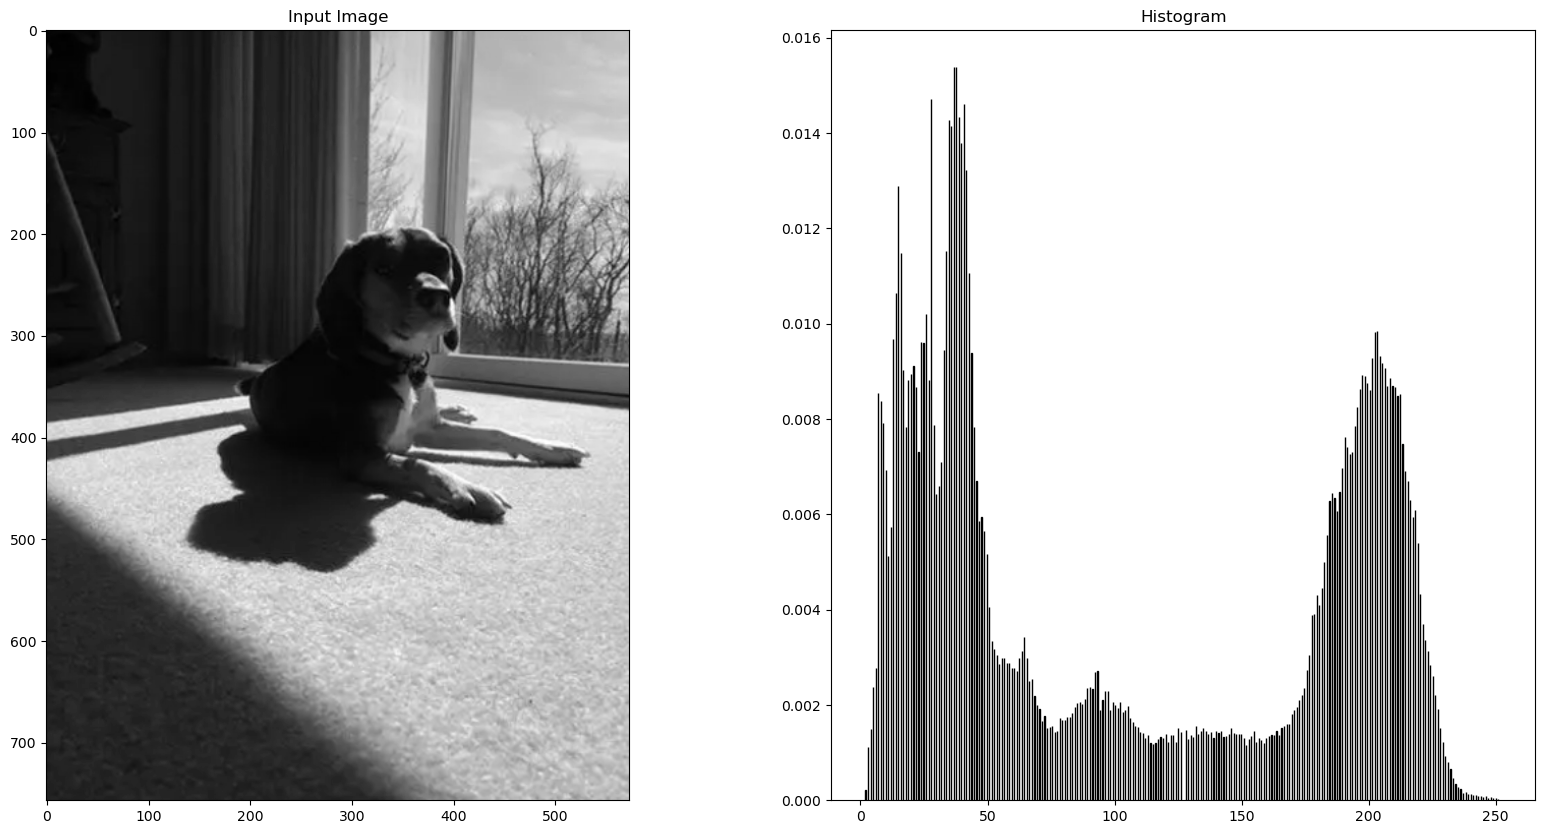

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio

img_input = cv2.imread('dog.png')
img = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
hist, bins = np.histogram(img, bins=255, density=True)

# Show the images
ax[0].set_title('Input Image')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Histogram')
ax[1].bar(bins[:-1], hist, width=0.05, edgecolor='k'); ## ; to print the unwanted displaying part

## Gamma Transformation and Histogram Equalization

Raise the intensity of each pixel to the power of $\gamma$.

<img src='question_sign.png' width=20px height=20px style="float:left;"> Which range of gamma makes the image lighter? Which range makes it darker?

<img src='question_sign.png' width=20px height=20px style="float:left;"> What happens to the image histogram with gamma transformation?

Adapt the code given below to take 4 gamma values and plot the histograms. Equalize the histograms and plot the resulting images. 

<img src='question_sign.png' width=20px height=20px style="float:left;"> Do all of them have the same histogram?

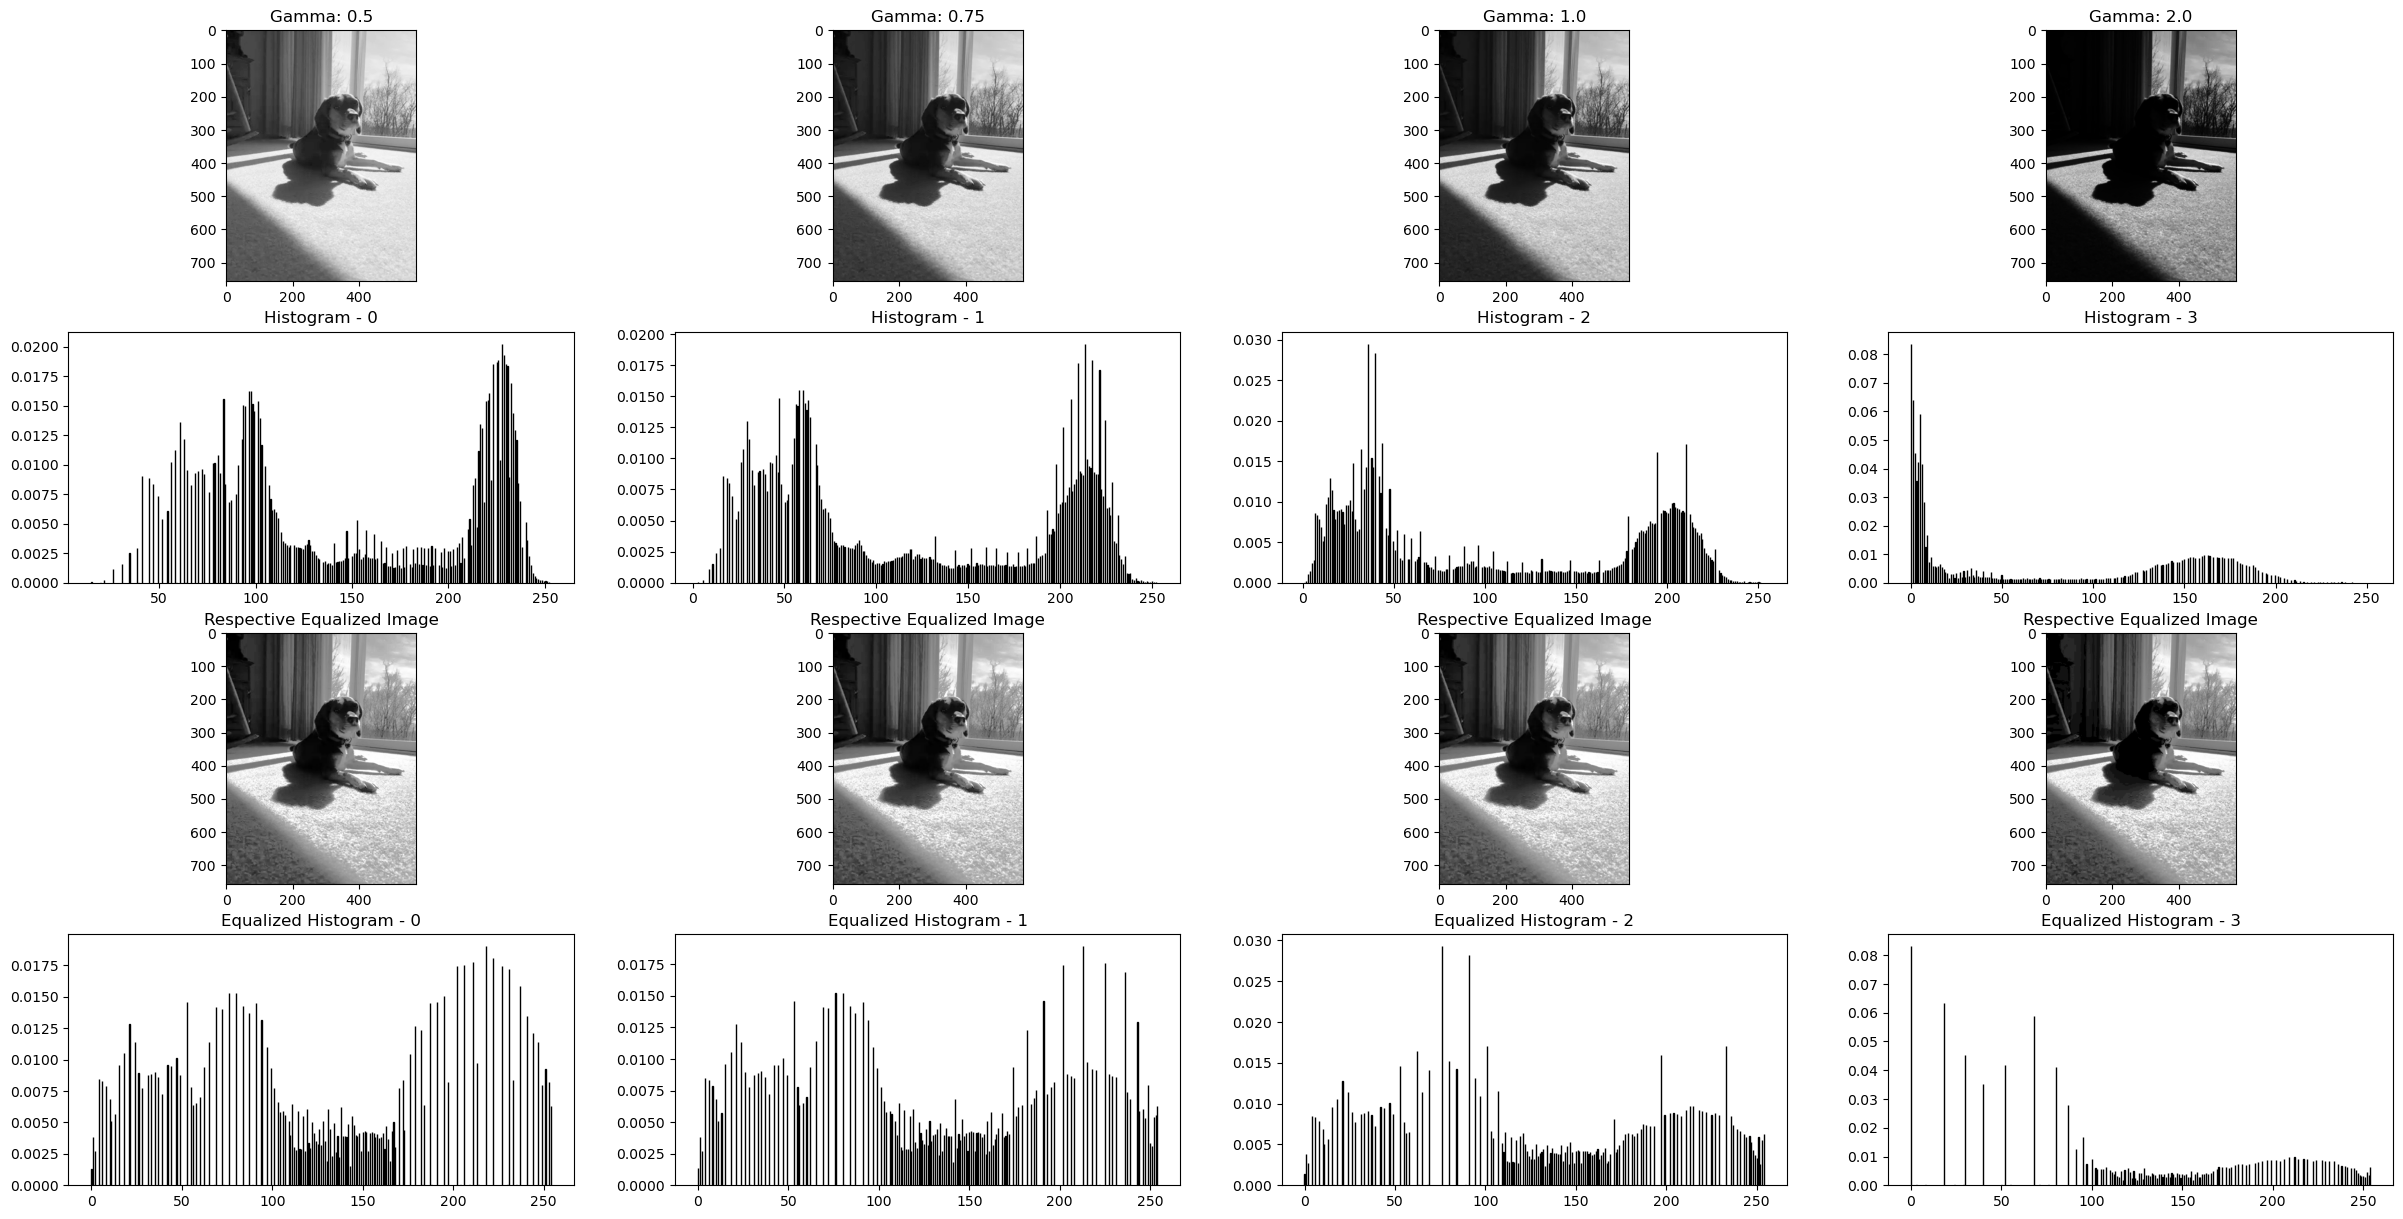

In [4]:
from skimage import io, exposure
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

img_input = cv2.imread('dog.png')
img = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)

Gamma =  [0.5,0.75,1.0,2.0] 

fig, ax = plt.subplots(4, len(Gamma), figsize=(30, 15))

#### Todo loop through use cv2.equalizeHist for histogram equalization
for index, gamma in enumerate(Gamma):

## Gaussian Filtering


The Gaussian filter acts as a low-pass filter. It has the low-pass behaviour in frequency domain as well.



<img src='question_sign.png' width=20px height=20px style="float:left;"> Explain the concept of a seperable filter kernel. What is the advantage of such a filter kernel?

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are important properties of Gaussian filters?

Given below is the code for Gaussian filtering an input image with a fixed standard deviation $\sigma$ = 2.

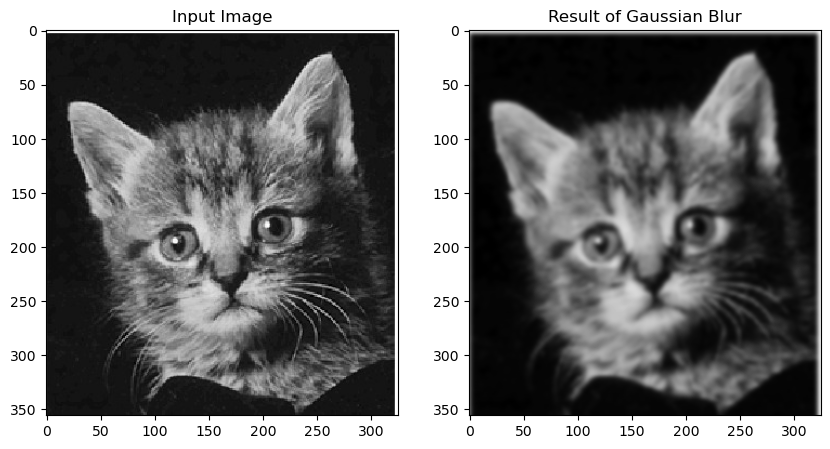

In [5]:
from scipy.ndimage import gaussian_filter

img_input = cv2.imread('cat.jpg')
img = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)

img_patch_gaussian = gaussian_filter(img,2)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(img_patch_gaussian, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of Gaussian Blur')
plt.show()

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are the main parameters of a Gaussian distribution?

<img src='question_sign.png' width=20px height=20px style="float:left;"> Which is a good kernel size for a Gaussian filter kernel and why?

Given below is the code for applying a Gaussian filter to an image, with a slider so that the standard deviation can be varied.

In [6]:
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
import ipywidgets as widgets
from PIL import Image, ImageFilter

# Define a function to blur the image with a variable sigma value
def blur_image(image_path, sigma):
    # Load the image
    img_input = cv2.imread('cat.jpg')
    img = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)

    blurred_image = gaussian_filter(img,sigma)

    # Display the original and blurred images side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    ax1.imshow(img, cmap=plt.get_cmap('gray'))
    ax1.set_title('Input Image')
    ax1.axis('off')
    ax2.imshow(blurred_image, cmap=plt.get_cmap('gray'))
    ax2.set_title('Blurred (sigma={:.1f})'.format(sigma))
    ax2.axis('off')
    plt.show()

# range of sigma values are passed here
sigma_slider = widgets.FloatSlider(min=0, max=40.0, step=2, value=2.0) ## Value indicates the starting value of slider position.

# Creates the interactive widget and here it passes the image and the sigma
blur_widget = interactive(blur_image, image_path=fixed('kitten-orig.gif'), sigma=sigma_slider)
display(blur_widget)

interactive(children=(FloatSlider(value=2.0, description='sigma', max=40.0, step=2.0), Output()), _dom_classes…

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are the main issues of supression of noise using Gaussian or averaging filters ? How could this be resolved ?

## Bilateral Filter 



In bilateral filtering low-pass filters such as the Gaussian filter are extended by a weighting
factor of the intensity or color difference of neighboring pixels compared to the central pixel.

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are the desired properties of the domain kernel?

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are the desired properties of range kernel?

Given below is an implementation of a bilateral filter for blurring the image. How would you choose the domain and range kernels? (Make sure you do not loose the whiskers of cat after the filtering!!!).

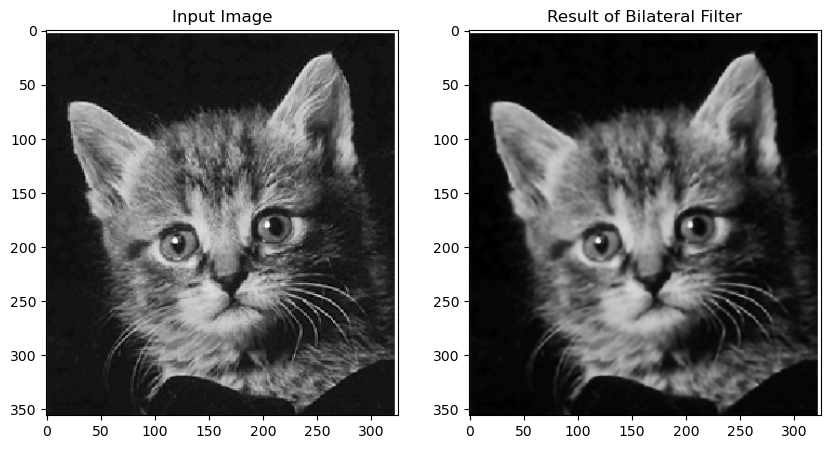

In [11]:
# Apply the Bilateral filter

sigma_range = # TODO
sigma_domain = # TODO
bilateral_filtered_img = cv2.bilateralFilter(img, 5, sigma_range, sigma_domain)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(bilateral_filtered_img, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of Bilateral Filter')
plt.show()

<img src='question_sign.png' width=20px height=20px style="float:left;"> Implement a bilateral filter for bluring the image. Please use the widget based approach with sliders for both domain and range kernels similar to the Gaussian blurring example given above.

In [12]:
import matplotlib.pyplot as plt
from ipywidgets import interactive , fixed
import ipywidgets as widgets
from PIL import Image, ImageFilter

# function to blur the image with a variable sigma value
def bilateral_image(image_path,  sigma_r ,sigma_d):
    # Load the image
    img_input = cv2.imread('cat.jpg')

    bilateral_image_out = ### TODO 
    ### use bilateralFilter function from cv2 library

    # Display the original and blurred images side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    ax1.imshow(img, cmap=plt.get_cmap('gray'))
    ax1.set_title('Input Image')
    ax1.axis('off')
    ax2.imshow(bilateral_image_out, cmap=plt.get_cmap('gray'))
    ax2.set_title('bilateral output')
    ax2.axis('off')
    plt.show()

# range of sigma values are passed here
## TODO
## Implement the widgets with minimum and maximum values as 0 and 500 and step size of 10
## And pass it to sigma_range and sigma_domain



# Creates the interactive widget and here it passes the image and the sigma
blur_widget = interactive(bilateral_image, image_path=fixed('cat.jpg'),sigma_r=sigma_range , sigma_d=sigma_domain)
display(blur_widget)

interactive(children=(FloatSlider(value=10.0, description='sigma_r', max=500.0, step=10.0), FloatSlider(value=…

### Rank Order Filters

<img src='question_sign.png' width=20px height=20px style="float:left;"> Which are the main three non-linear rank order filters? \
Mean, Max and Median.

Below is an implementation of a minimum filter. Play with the filter size parameter and interpret the behavior you observe.

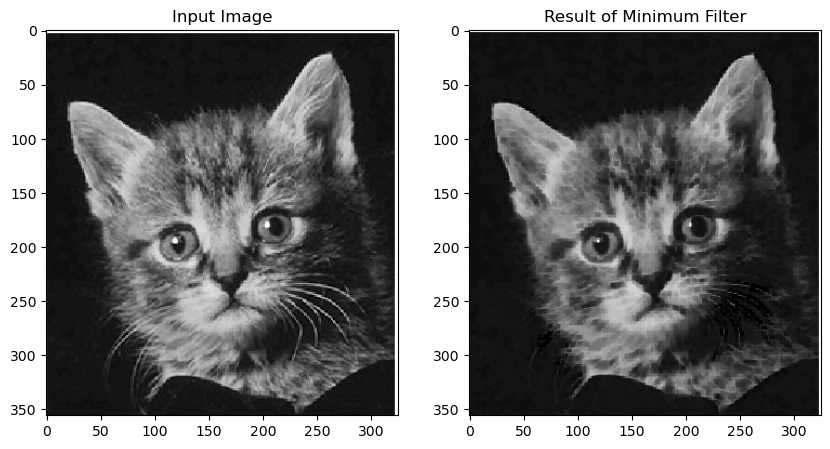

In [13]:
from scipy.ndimage import minimum_filter

img_input = cv2.imread('cat.jpg')
output_image = minimum_filter(img, size=3)
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(output_image, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of the Minimum Filter')
plt.show()
              

Below is an implementation of a maximum filter. Play with the filter size parameter and interpret the behavior you observe.

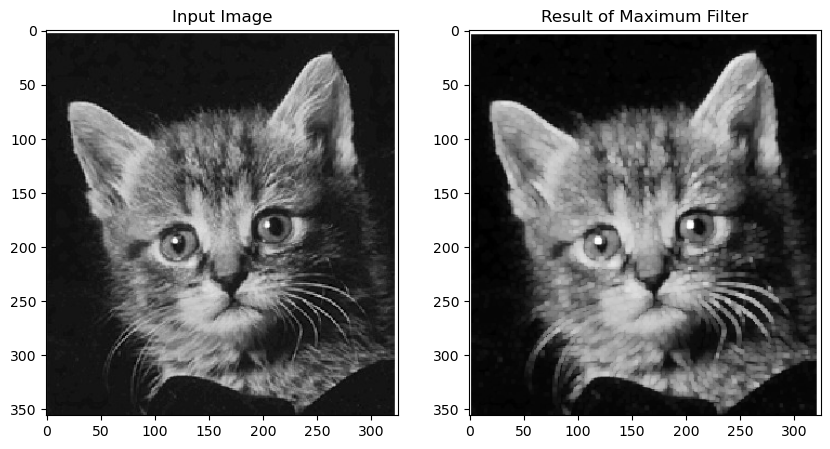

In [14]:
from scipy.ndimage import maximum_filter

output_image = maximum_filter(img, size=3)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(output_image, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of the Maximum Filter')
plt.show()

Below is an implementation of a median filter. Play with the filter size parameter and interpret the behavior you observe.

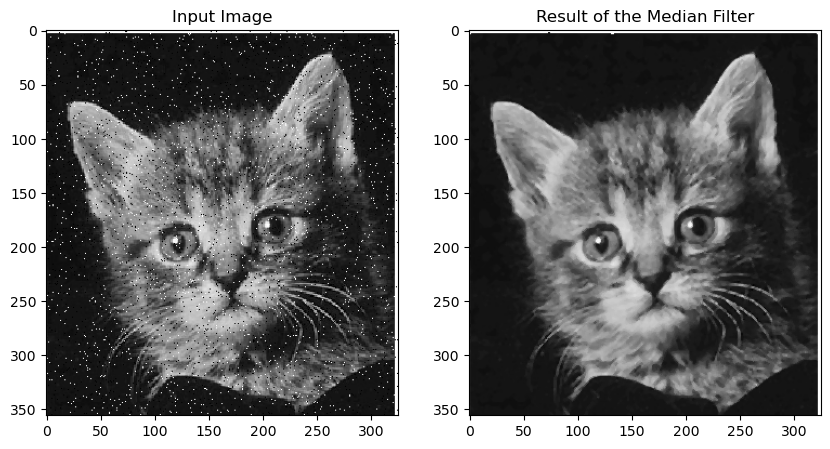

In [17]:
from scipy.ndimage import median_filter

output_image = median_filter(img, size=3)
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(output_image, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of the Median Filter')
plt.show()

<img src='question_sign.png' width=20px height=20px style="float:left;"> What type of noise is effectively filtered by the median filter ? \
Salt and pepper noise.

Below is an implementation of the median filter to remove salt and pepper noise.

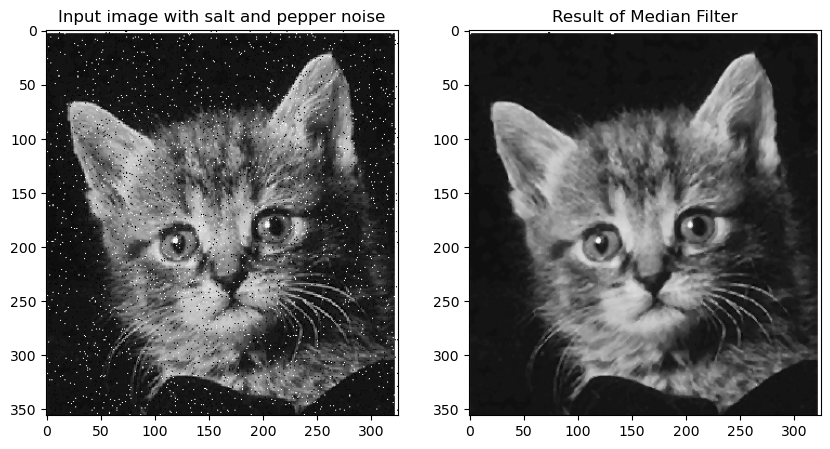

In [16]:
noise_image = np.zeros(img.shape, np.uint8)
cv2.randu(noise_image, 0, 255)
salt = noise_image > 250
pepper = noise_image < 5

img[salt] = 255
img[pepper] = 0

output_image = median_filter(img, size=3)
    

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input image with salt and pepper noise')
ax2.imshow(output_image, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of the Median Filter')
plt.show()
# Plot the image